[[0.29408453]
 [0.0041261 ]
 [0.09553179]
 [1.        ]
 [0.        ]]
           SoL_obs01    P_2016
SoL_obs01   1.000000 -0.061141
P_2016     -0.061141  1.000000


KeyError: 'SoL_obs02'

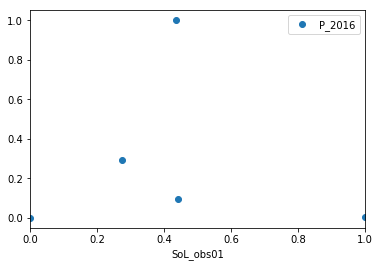

In [58]:
import pandas as pd
import numpy as np
from pathlib import Path
#import matplotlib.plot as plt
from sklearn import preprocessing

BASEDIR = Path('.').resolve().parent
levels = {'HTI': 1}
#levels = {'HTI': 3, 'GHA': 2, 'MOZ': 3, 'NAM': 3, 'NPL': 4}
for country, level in levels.items():
    pop_table = BASEDIR.joinpath(f'datain/{country}/{country.lower()}_population_2000_2020_names.csv')
    stat_table = BASEDIR.joinpath(f'dataout/{country}/{country}_zonal_stats.csv')
    pop_df = pd.read_csv(str(pop_table))
    stat_df = pd.read_csv(str(stat_table))
    stat_df = stat_df[stat_df['ADM1'] != 'Nippes']
    stat_df['ADM1'] = stat_df['ADM1'].str.upper()
    pop_df = pop_df[[f'NAME{level}', 'P_2016']]
    pop_df = pop_df.groupby([f'NAME{level}']).sum()
    pop_df = pop_df.reset_index()
    #print(pop_df.head())
    #print(stat_df.head())
    df = pd.merge(pop_df, stat_df, left_on='NAME1', right_on='ADM1')
min_max_scaler = preprocessing.MinMaxScaler()
df_year = pd.DataFrame(df['P_2016'])
np_scaled = min_max_scaler.fit_transform(df_year)
print(np_scaled)
df['P_2016'] = np_scaled
for i in range(12):
    if len(str(i+1)) < 2:
        col = f'SoL_obs0{i+1}'
        df_col = pd.DataFrame(df[col])
        np_scaled = min_max_scaler.fit_transform(df_col)
        df[col] = np_scaled        
        df.plot(y='P_2016', x=f'SoL_obs0{i+1}', style='o')
        df = df[[col, 'P_2016']]
        print(df.corr(method='pearson'))
    else:
        col = f'SoL_obs{i+1}'
        df_col = pd.DataFrame(df[col])
        np_scaled = min_max_scaler.fit_transform(df_col)
        df[col] = np_scaled
        df.plot(y='P_2016', x=f'SoL_obs{i+1}', style='o')
        df = df[[col, 'P_2016']]
        print(df.corr(method='pearson'))
        

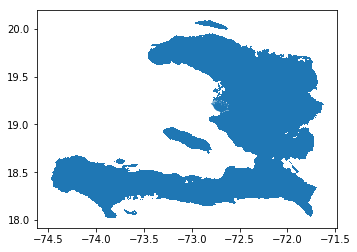

In [63]:
import geopandas as gpd
import numpy as np
import pandas as pd
from pathlib import Path

BASEDIR = Path('.').resolve().parent.joinpath('datain')
shps = [x for x in BASEDIR.iterdir() if ]
gdf = gpd.read_file(str(BASEDIR))
gdf.crs = {'init': 'epsg: 4326'}
gdf.plot()

In [148]:
from sklearn import preprocessing
csv1 = BASEDIR.parent.parent.parent.parent.joinpath('dataout/HTI/HTI_viirs_L4_01.csv')
csv2 = BASEDIR.parent.parent.parent.parent.joinpath('dataout/HTI/HTI_viirs_L4_02.csv')
csv3 = BASEDIR.parent.parent.parent.parent.joinpath('dataout/HTI/HTI_viirs_L4_03.csv')
csv = pd.read_csv(str(csv1))
csv = csv['NAME4']
csvs = [csv1, csv2, csv3]
csvs = [x for x in BASEDIR.parent.parent.parent.parent.joinpath('dataout/HTI').iterdir() if x.name.startswith('HTI_viirs')]
csv = []
for i, csv_month in enumerate(csvs):
    df = pd.read_csv(csv_month).set_index('NAME4')
    df = df[['sum']]
    df = df.fillna(value=0)
    df.columns = [f'sum{i+1}']
    min_max_scaler = preprocessing.MinMaxScaler()
    df_viirs = pd.DataFrame(df[f'sum{i+1}'])
    df_viirs = min_max_scaler.fit_transform(df_viirs)
    df[f'sum{i+1}'] = df_viirs
    csv.append(df)

csv = pd.concat(csv, axis=1)
ppp = pd.read_csv(BASEDIR.parent.parent.parent.parent.joinpath('dataout/HTI/HTI_ppp_stats.csv')).set_index('NAME4')
#ppp = ppp['sum']
#ppp.columns = ['sum_ppp']
min_max_scaler = preprocessing.MinMaxScaler()
df_ppp = pd.DataFrame(ppp['sum'])
df_ppp = min_max_scaler.fit_transform(df_ppp)
ppp['sum'] = df_ppp
type(ppp)
final_df = pd.concat([csv, ppp], axis=1)
final_df


,sum1,sum2,sum3,sum4,sum5,sum6,sum7,sum8,sum9,sum10,sum11,sum12,Unnamed: 0,sum
NAME4,,,,,,,,,,,,,,
1ere Doland,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.022536
7eme Moulin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.028416
3eme Lagon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,0.018377
6eme Savane Carree,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0.043999
2eme Bas Coursin,0.000000,0.028422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0.024894
2eme Fosse Naboth,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017636,0.000000,0.000000,0.033313,0.000000,0.000000,5,0.055315
3eme Riviere Blanche,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6,0.105352
6eme Terre Natte,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7,0.023923
3eme Goyavier,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8,0.020391


Month 1 has corr of            sum      sum1
sum   1.000000  0.822606
sum1  0.822606  1.000000
Month 2 has corr of            sum      sum2
sum   1.000000  0.821215
sum2  0.821215  1.000000
Month 3 has corr of            sum      sum3
sum   1.000000  0.826502
sum3  0.826502  1.000000
Month 4 has corr of            sum      sum4
sum   1.000000  0.796873
sum4  0.796873  1.000000
Month 5 has corr of            sum      sum5
sum   1.000000  0.786783
sum5  0.786783  1.000000
Month 6 has corr of            sum      sum6
sum   1.000000  0.808028
sum6  0.808028  1.000000
Month 7 has corr of            sum      sum7
sum   1.000000  0.814307
sum7  0.814307  1.000000
Month 8 has corr of            sum      sum8
sum   1.000000  0.776831
sum8  0.776831  1.000000
Month 9 has corr of            sum      sum9
sum   1.000000  0.828772
sum9  0.828772  1.000000
Month 10 has corr of            sum    sum10
sum    1.00000  0.79776
sum10  0.79776  1.00000
Month 11 has corr of             sum     sum11
sum  

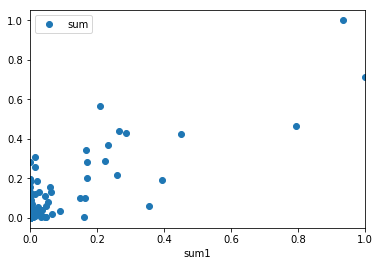

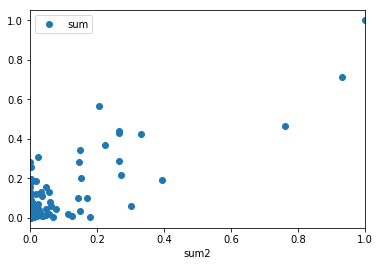

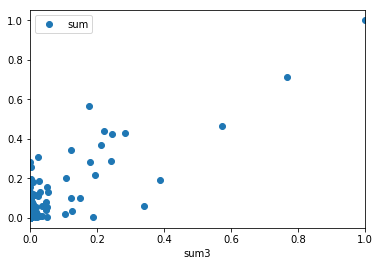

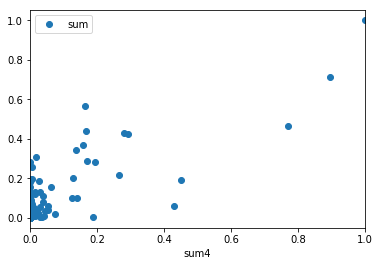

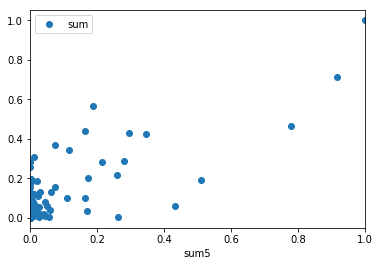

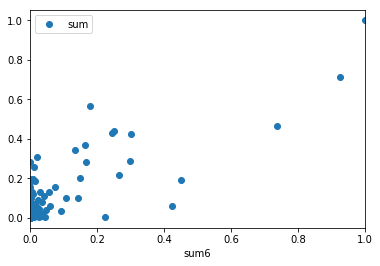

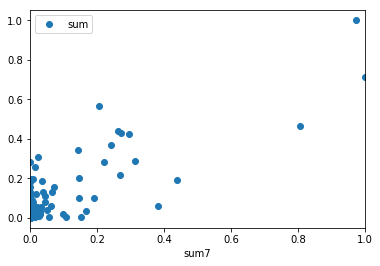

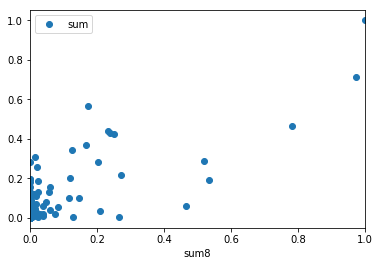

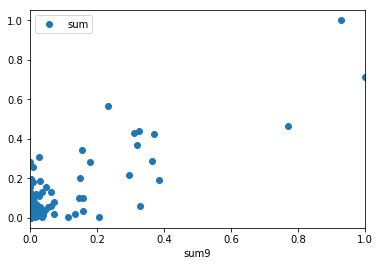

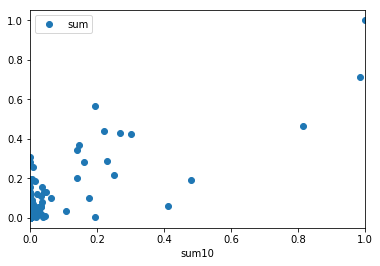

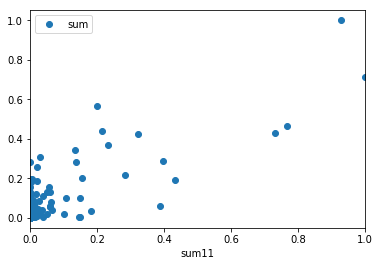

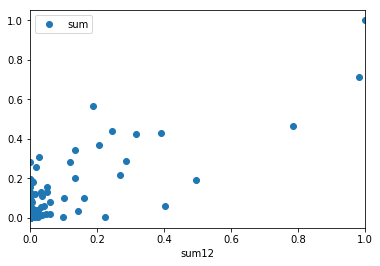

In [149]:
final_df = final_df.fillna(value=0)
final_df
for i in range(1,13):
    final_df.plot(y='sum', x=f'sum{i}', style='o')
    sub_df = final_df[['sum', f'sum{i}']]
    print(f'Month {i} has corr of {sub_df.corr(method="pearson")}')

In [162]:
import rasterio
from pathlib import Path

BASEDIR = Path('.').resolve().parent.joinpath('datain/HTI/01')
raster = BASEDIR.joinpath('HTI_01_rad_tmp.tif')
with rasterio.open(str(raster)) as src:
    data = src.read()
    data[data == -99999] = 0
    print(sum(data[data > 0]))
    print(sum(data[data > 2]))

16695.770019803196
13538.330020666122
